Cargando dataset: Electricity...
  - Frecuencia: <Hour>
  - Puntos de datos: 21044
  - Rango: 2012-01-01 00:00:00 a 2014-05-26 19:00:00

Cargando dataset: Traffic...
  - Frecuencia: <Hour>
  - Puntos de datos: 14036
  - Rango: 2015-01-01 00:00:00 a 2016-08-07 19:00:00

Cargando dataset: Exchange Rate...
  - Frecuencia: <BusinessDay>
  - Puntos de datos: 6071
  - Rango: 1990-01-01 00:00:00 a 2013-04-08 00:00:00



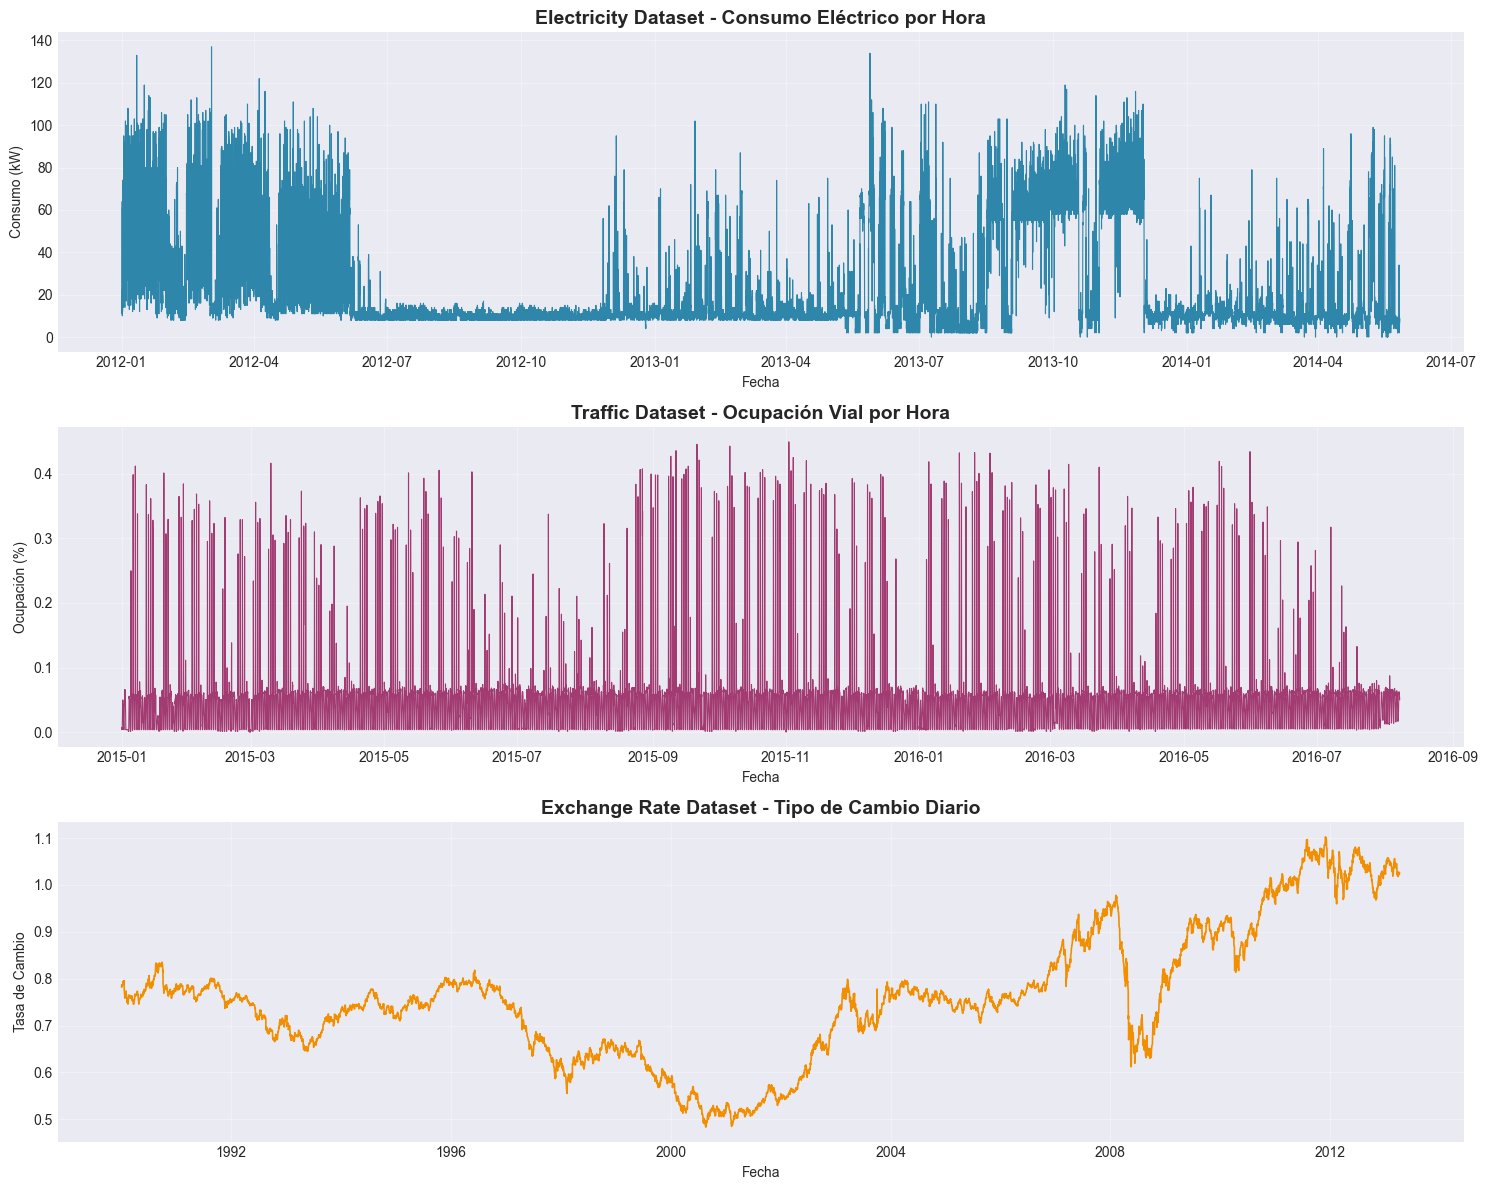

✓ Gráficos generados exitosamente


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.repository import get_dataset
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ===== DATASET 1: Electricity =====
print("Cargando dataset: Electricity...")
electricity = get_dataset("electricity")

# Extraer primera serie temporal
elec_series = list(electricity.train)[0]
# Convertir Period a Timestamp
start_timestamp = elec_series['start'].to_timestamp()
elec_df = pd.DataFrame({
    'timestamp': pd.date_range(start=start_timestamp, 
                               periods=len(elec_series['target']), 
                               freq=elec_series['start'].freq),
    'value': elec_series['target']
})

axes[0].plot(elec_df['timestamp'], elec_df['value'], linewidth=0.8, color='#2E86AB')
axes[0].set_title('Electricity Dataset - Consumo Eléctrico por Hora', 
                   fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Consumo (kW)')
axes[0].grid(True, alpha=0.3)

print(f"  - Frecuencia: {elec_series['start'].freq}")
print(f"  - Puntos de datos: {len(elec_series['target'])}")
print(f"  - Rango: {elec_df['timestamp'].min()} a {elec_df['timestamp'].max()}\n")

# ===== DATASET 2: Traffic =====
print("Cargando dataset: Traffic...")
traffic = get_dataset("traffic")

# Extraer primera serie temporal
traffic_series = list(traffic.train)[0]
start_timestamp = traffic_series['start'].to_timestamp()
traffic_df = pd.DataFrame({
    'timestamp': pd.date_range(start=start_timestamp, 
                               periods=len(traffic_series['target']), 
                               freq=traffic_series['start'].freq),
    'value': traffic_series['target']
})

axes[1].plot(traffic_df['timestamp'], traffic_df['value'], linewidth=0.8, color='#A23B72')
axes[1].set_title('Traffic Dataset - Ocupación Vial por Hora', 
                   fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Ocupación (%)')
axes[1].grid(True, alpha=0.3)

print(f"  - Frecuencia: {traffic_series['start'].freq}")
print(f"  - Puntos de datos: {len(traffic_series['target'])}")
print(f"  - Rango: {traffic_df['timestamp'].min()} a {traffic_df['timestamp'].max()}\n")

# ===== DATASET 3: Exchange Rate =====
print("Cargando dataset: Exchange Rate...")
exchange = get_dataset("exchange_rate")

# Extraer primera serie temporal
exchange_series = list(exchange.train)[0]
start_timestamp = exchange_series['start'].to_timestamp()
exchange_df = pd.DataFrame({
    'timestamp': pd.date_range(start=start_timestamp, 
                               periods=len(exchange_series['target']), 
                               freq=exchange_series['start'].freq),
    'value': exchange_series['target']
})

axes[2].plot(exchange_df['timestamp'], exchange_df['value'], linewidth=1.2, color='#F18F01')
axes[2].set_title('Exchange Rate Dataset - Tipo de Cambio Diario', 
                   fontsize=14, fontweight='bold')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Tasa de Cambio')
axes[2].grid(True, alpha=0.3)

print(f"  - Frecuencia: {exchange_series['start'].freq}")
print(f"  - Puntos de datos: {len(exchange_series['target'])}")
print(f"  - Rango: {exchange_df['timestamp'].min()} a {exchange_df['timestamp'].max()}\n")

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

print("✓ Gráficos generados exitosamente")